À propos du jeu de données.(trouvés sur kaggle,30 columns,623209 lignes, les donéés de type: string(13),decimal(8),boolean(7))

Ce jeu de données simule les facteurs de risque d'infarctus chez des individus à travers le monde, en couvrant divers aspects démographiques, liés au mode de vie, médicaux et environnementaux. Il comprend des enregistrements provenant de 25 pays, générés selon des distributions et des modèles reflétant des données réelles sur la santé cardiovasculaire. Il est conçu pour l'apprentissage automatique, l'analyse statistique et la recherche sur la prédiction et la prévention des infarctus.
 
les donnéés qu'il contient sur les personnes : le pays, l'age,le genre,le Niveau de cholestérol,la Tension artérielle,Historique de tabagisme, Consommation d'alcool, Activité physique, Obésité, Diabète, Antécédents familiaux, Niveaux de stress, Habitudes alimentaires, Antécédents d'infarctus, Douleur thoracique, Angine induite par l'effort, ECG au repos, Fréquence cardiaque maximale atteinte, Thalassémie, Cholestérol HDL, Cholestérol LDL, Triglycérides, Risque de maladie cardiaque, Adhérence au traitement médicamenteux, Niveau d'urbanisation, Exposition à la pollution de l'air, Accès aux soins de santé, Niveau d'éducation, Niveau de revenu, Issue de l'infarctus

In [1]:
## Importation du fichier CSV dans SQLite
import sqlite3
import pandas as pd

# Connexion à la base de données SQLite
conn = sqlite3.connect('crisecardiaque.db')
cursor = conn.cursor()

# Charger le fichier CSV avec pandas
df = pd.read_csv('C:/Users/oumar/OneDrive/Bureau/b2 projet data/data/crisecardiaque.csv')

# Créer la table dans SQLite en utilisant le nom des colonnes
df.to_sql('crisecardiaque', conn, if_exists='replace', index=False)

C:\Users\oumar\AppData\Local\Temp\ipykernel_18576\3030898490.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


623027

In [2]:
# verifions si les donnéés ont ete bien chargés.
conn = sqlite3.connect('crisecardiaque.db')
cursor = conn.cursor()

# Exécutons une requête pour obtenir les 30 premières lignes
cursor.execute("SELECT * FROM crisecardiaque LIMIT 30;")
rows = cursor.fetchall()

# Affichage des résultats
for row in rows:
    print(row)

# Fermer la connexion
conn.close()

('Germany', 39, 'Male', 210.09103562105847, 173.30164988119017, 'Never', 0.5319327379540506, 'Active', 'No', 'No', 'Yes', 3.5590352667159, 'Healthy', 'Yes', 'Yes', 'Yes', 'Abnormal', 170, 'Reversible Defect', 96.5455220317344, 68.33357254046015, 165.06089695495723, 'Medium', 'No', 'Urban', 51.98841590836633, 'Good', 'Tertiary', 'Low', 'Died')
('Egypt', 88, 'Male', 163.99872977451642, 137.38167772509746, 'Former', 5.626668425044175, 'Sedentary', 'Yes', 'Yes', 'No', 6.193046637238362, 'Moderate', 'Yes', 'No', 'Yes', 'Normal', 155, 'Reversible Defect', 92.52464360008666, 98.19401509632416, 452.1246511240527, 'Medium', 'No', 'Suburban', 97.73989585196118, 'Good', None, 'Low', 'Died')
('Spain', 60, 'Female', 263.50258982534683, 139.73767747628784, 'Former', 0.9280150545444464, 'Active', 'No', 'Yes', 'No', 4.964535679581507, 'Moderate', 'Yes', 'No', 'Yes', 'Normal', 114, 'Normal', 71.54163706307735, 118.76767655482418, 171.4326198372325, 'Low', 'No', 'Urban', 60.3527933675109, 'Poor', 'Terti

NETTOYAGE , ORGANISATION, PREPARATION.

In [4]:
# je me connecte a ma base de donéés pour toute la duréé du processus.
conn = sqlite3.connect('crisecardiaque.db')
cursor = conn.cursor()

In [5]:
#  le nombre de lignes et de colonnes
cursor.execute("SELECT COUNT(*) FROM crisecardiaque;")
rows = cursor.fetchone()[0]

#  les types de données des colonnes
cursor.execute("PRAGMA table_info(crisecardiaque);")
columns_info = cursor.fetchall()

print(f"Nombre de lignes : {rows}")
for column in columns_info:
    print(f"Nom de la colonne : {column[1]}, Type : {column[2]}")

Nombre de lignes : 623027
Nom de la colonne : Country, Type : TEXT
Nom de la colonne : Age, Type : INTEGER
Nom de la colonne : Gender, Type : TEXT
Nom de la colonne : Cholesterol_Level, Type : REAL
Nom de la colonne : Blood_Pressure, Type : REAL
Nom de la colonne : Smoking_History, Type : TEXT
Nom de la colonne : Alcohol_Consumption, Type : REAL
Nom de la colonne : Physical_Activity, Type : TEXT
Nom de la colonne : Obesity, Type : TEXT
Nom de la colonne : Diabetes, Type : TEXT
Nom de la colonne : Family_History, Type : TEXT
Nom de la colonne : Stress_Levels, Type : REAL
Nom de la colonne : Dietary_Habits, Type : TEXT
Nom de la colonne : Heart_Attack_History, Type : TEXT
Nom de la colonne : Chest_Pain, Type : TEXT
Nom de la colonne : Exercise_Induced_Angina, Type : TEXT
Nom de la colonne : Resting_ECG, Type : TEXT
Nom de la colonne : Max_Heart_Rate_Achieved, Type : INTEGER
Nom de la colonne : Thalassemia, Type : TEXT
Nom de la colonne : HDL_Cholesterol, Type : REAL
Nom de la colonne : L

In [12]:
# vérification des doublons.
cursor.execute('''
    SELECT Country, Age, Gender, Cholesterol_Level, Blood_Pressure, Smoking_History, Alcohol_Consumption, 
           Physical_Activity, Obesity, Diabetes, Family_History, Stress_Levels, Dietary_Habits, 
           Heart_Attack_History, Chest_Pain, Exercise_Induced_Angina, Resting_ECG, Max_Heart_Rate_Achieved, 
           Thalassemia, HDL_Cholesterol, LDL_Cholesterol, Triglycerides, Heart_Disease_Risk, Medication_Adherence, 
           Urbanization_Level, Air_Pollution_Exposure, Access_To_Healthcare, Education_Level, Income_Level, 
           Heart_Attack_Outcome, COUNT(*) 
    FROM crisecardiaque 
    GROUP BY Country, Age, Gender, Cholesterol_Level, Blood_Pressure, Smoking_History, Alcohol_Consumption, 
             Physical_Activity, Obesity, Diabetes, Family_History, Stress_Levels, Dietary_Habits, 
             Heart_Attack_History, Chest_Pain, Exercise_Induced_Angina, Resting_ECG, Max_Heart_Rate_Achieved, 
             Thalassemia, HDL_Cholesterol, LDL_Cholesterol, Triglycerides, Heart_Disease_Risk, Medication_Adherence, 
             Urbanization_Level, Air_Pollution_Exposure, Access_To_Healthcare, Education_Level, Income_Level, 
             Heart_Attack_Outcome
    HAVING COUNT(*) > 1;
''')
duplicates = cursor.fetchall()

if duplicates:
    print("Doublons trouvés dans les lignes suivantes :")
    for row in duplicates:
        print(row)
else:
    print("Aucun doublon trouvé.")

Aucun doublon trouvé.


In [ ]:
# ici nous allons traité les valeurs abberantes
import sqlite3
import numpy as np

# Connexion à la base de données SQLite meme si je suis deja connecté mais faisons ca ainsi.
conn = sqlite3.connect('crisecardiaque.db')
cursor = conn.cursor()

# calcul de la médiane, Q1 (1er quartile) et Q3 (3ème quartile)
def calculate_median_and_iqr(column_name):
    cursor.execute(f"SELECT {column_name} FROM crisecardiaque WHERE {column_name} IS NOT NULL")
    rows = cursor.fetchall()
    values = [row[0] for row in rows]
    
    median = np.median(values)
    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    iqr = q3 - q1
    
    return median, q1, q3, iqr

# Colonnes numériques à nettoyer
columns_to_clean = ['Age', 'Cholesterol_Level', 'Blood_Pressure', 'Triglycerides', 'Stress_Levels']

# Suppression des valeurs aberrantes en dehors de la plage [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
for column in columns_to_clean:
    median, q1, q3, iqr = calculate_median_and_iqr(column)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"Traitement des valeurs aberrantes pour {column}:")
    print(f"Médiane = {median}, Q1 = {q1}, Q3 = {q3}, IQR = {iqr}")
    print(f"Borne inférieure = {lower_bound}, Borne supérieure = {upper_bound}")
    
    # Suppression des lignes dont la valeur est en dehors de la plage (valeur aberrante)
    cursor.execute(f"DELETE FROM crisecardiaque WHERE {column} < ? OR {column} > ?", (lower_bound, upper_bound))
    conn.commit()

print("Traitement des valeurs aberrantes terminé.")

Traitement des valeurs aberrantes pour Age:
Médiane = 53.0, Q1 = 35.0, Q3 = 72.0, IQR = 37.0
Borne inférieure = -20.5, Borne supérieure = 127.5
Traitement des valeurs aberrantes pour Cholesterol_Level:
Médiane = 224.83573250328965, Q1 = 187.55125476313168, Q3 = 262.4263815534588, IQR = 74.8751267903271
Borne inférieure = 75.23856457764103, Borne supérieure = 374.7390717389494
Traitement des valeurs aberrantes pour Blood_Pressure:
Médiane = 130.03666562595683, Q1 = 105.00701446421493, Q3 = 154.9826904044143, IQR = 49.97567594019938
Borne inférieure = 30.043500553915862, Borne supérieure = 229.94620431471338
Traitement des valeurs aberrantes pour Triglycerides:
Médiane = 275.0260277112493, Q1 = 162.20163531686822, Q3 = 387.2654941726234, IQR = 225.06385885575517
Borne inférieure = -175.39415296676455, Borne supérieure = 724.8612824562562
Traitement des valeurs aberrantes pour Stress_Levels:
Médiane = 5.511778272396353, Q1 = 3.2570091119977813, Q3 = 7.758713125024384, IQR = 4.501704013026

In [18]:
# Affichage des premières lignes pour vérifier les modification
cursor.execute("SELECT * FROM crisecardiaque LIMIT 10;")
rows = cursor.fetchall()
for row in rows:
    print(row)

('Germany', 39, 'Male', 210.09103562105847, 173.30164988119017, 'Never', 0.5319327379540506, 'Active', 'No', 'No', 'Yes', 3.5590352667159, 'Healthy', 'Yes', 'Yes', 'Yes', 'Abnormal', 170, 'Reversible Defect', 96.5455220317344, 68.33357254046015, 165.06089695495723, 'Medium', 'No', 'Urban', 51.98841590836633, 'Good', 'Tertiary', 'Low', 'Died')
('Egypt', 88, 'Male', 163.99872977451642, 137.38167772509746, 'Former', 5.626668425044175, 'Sedentary', 'Yes', 'Yes', 'No', 6.193046637238362, 'Moderate', 'Yes', 'No', 'Yes', 'Normal', 155, 'Reversible Defect', 92.52464360008666, 98.19401509632416, 452.1246511240527, 'Medium', 'No', 'Suburban', 97.73989585196118, 'Good', None, 'Low', 'Died')
('Spain', 60, 'Female', 263.50258982534683, 139.73767747628784, 'Former', 0.9280150545444464, 'Active', 'No', 'Yes', 'No', 4.964535679581507, 'Moderate', 'Yes', 'No', 'Yes', 'Normal', 114, 'Normal', 71.54163706307735, 118.76767655482418, 171.4326198372325, 'Low', 'No', 'Urban', 60.3527933675109, 'Poor', 'Terti

In [21]:
#Les enregistrements avec des valeurs manquantes dans les colonnes texte seront supprimés.
#Les valeurs manquantes dans les colonnes numériques seront remplacées par la médiane de ces colonnes.



#  calcul de  la médiane d'une colonne numérique
def calculate_median(column_name):
    cursor.execute(f"SELECT {column_name} FROM crisecardiaque WHERE {column_name} IS NOT NULL")
    rows = cursor.fetchall()
    
    # Filtrer les valeurs non numériques dans les résultats
    values = [row[0] for row in rows if isinstance(row[0], (int, float))]
    
    return np.median(values) if values else None

# Colonnes de type texte à vérifier (liste basée sur les colonnes texte dans votre table)
text_columns = ['Country', 'Gender', 'Smoking_History', 'Alcohol_Consumption', 'Physical_Activity', 
                'Obesity', 'Diabetes', 'Family_History', 'Dietary_Habits', 'Heart_Attack_History', 
                'Chest_Pain', 'Exercise_Induced_Angina', 'Resting_ECG', 'Heart_Disease_Risk', 
                'Medication_Adherence', 'Access_To_Healthcare', 'Education_Level', 'Income_Level', 
                'Heart_Attack_Outcome']

# Colonnes numériques à vérifier (liste basée sur les colonnes numériques dans votre table)
numeric_columns = ['Age', 'Cholesterol_Level', 'Blood_Pressure', 'Stress_Levels', 'Max_Heart_Rate_Achieved',
                   'HDL_Cholesterol', 'LDL_Cholesterol', 'Triglycerides', 'Thalassemia', 'Urbanization_Level', 
                   'Air_Pollution_Exposure']

# Vérification et suppression des lignes contenant des valeurs manquantes dans les colonnes texte
for column in text_columns:
    cursor.execute(f"DELETE FROM crisecardiaque WHERE {column} IS NULL")
    conn.commit()
    print(f"Valeurs manquantes dans la colonne {column} supprimées.")

# Vérification et remplacement des valeurs manquantes dans les colonnes numériques par la médiane
for column in numeric_columns:
    median = calculate_median(column)
    
    if median is not None:
        cursor.execute(f"UPDATE crisecardiaque SET {column} = ? WHERE {column} IS NULL", (median,))
        conn.commit()
        print(f"Valeurs manquantes dans la colonne {column} remplacées par la médiane ({median}).")
    else:
        print(f"Aucune valeur médiane trouvée pour {column}, aucun remplacement effectué.")

print("Traitement des valeurs manquantes terminé.")

Valeurs manquantes dans la colonne Country supprimées.
Valeurs manquantes dans la colonne Gender supprimées.
Valeurs manquantes dans la colonne Smoking_History supprimées.
Valeurs manquantes dans la colonne Alcohol_Consumption supprimées.
Valeurs manquantes dans la colonne Physical_Activity supprimées.
Valeurs manquantes dans la colonne Obesity supprimées.
Valeurs manquantes dans la colonne Diabetes supprimées.
Valeurs manquantes dans la colonne Family_History supprimées.
Valeurs manquantes dans la colonne Dietary_Habits supprimées.
Valeurs manquantes dans la colonne Heart_Attack_History supprimées.
Valeurs manquantes dans la colonne Chest_Pain supprimées.
Valeurs manquantes dans la colonne Exercise_Induced_Angina supprimées.
Valeurs manquantes dans la colonne Resting_ECG supprimées.
Valeurs manquantes dans la colonne Heart_Disease_Risk supprimées.
Valeurs manquantes dans la colonne Medication_Adherence supprimées.
Valeurs manquantes dans la colonne Access_To_Healthcare supprimées.
Val

In [27]:
# la je groupe par toutes les valeurs numerique que je stocke dans un fichier pour avoir une vision general et pour une analyse approfondie.
import sqlite3
import pandas as pd

# Connexion à la base de données SQLite
conn = sqlite3.connect('crisecardiaque.db')
cursor = conn.cursor()

# Requête SQL pour regrouper les données logiquement
query = '''
SELECT 
    Country,
    Gender,
    CASE
        WHEN Age BETWEEN 20 AND 30 THEN '20-30'
        WHEN Age BETWEEN 31 AND 40 THEN '31-40'
        WHEN Age BETWEEN 41 AND 50 THEN '41-50'
        WHEN Age BETWEEN 51 AND 60 THEN '51-60'
        WHEN Age > 60 THEN '60+'
        ELSE 'Unknown'
    END AS Age_Group,
    AVG(Cholesterol_Level) AS Avg_Cholesterol_Level,
    AVG(Blood_Pressure) AS Avg_Blood_Pressure,
    AVG(Stress_Levels) AS Avg_Stress_Levels,
    AVG(HDL_Cholesterol) AS Avg_HDL_Cholesterol,
    AVG(LDL_Cholesterol) AS Avg_LDL_Cholesterol,
    AVG(Triglycerides) AS Avg_Triglycerides,
    COUNT(*) AS Total_Records,
    SUM(CASE WHEN Smoking_History = 'Yes' THEN 1 ELSE 0 END) AS Count_Smoking,
    SUM(CASE WHEN Alcohol_Consumption > 0 THEN 1 ELSE 0 END) AS Count_Alcohol_Consumption,
    SUM(CASE WHEN Physical_Activity = 'Active' THEN 1 ELSE 0 END) AS Count_Physically_Active,
    SUM(CASE WHEN Obesity = 'Yes' THEN 1 ELSE 0 END) AS Count_Obesity,
    SUM(CASE WHEN Diabetes = 'Yes' THEN 1 ELSE 0 END) AS Count_Diabetes,
    SUM(CASE WHEN Heart_Attack_Outcome = 'Died' THEN 1 ELSE 0 END) AS Count_Heart_Attack_Died
FROM 
    crisecardiaque
WHERE 
    Age IS NOT NULL AND Gender IS NOT NULL
GROUP BY 
    Country, Gender, Age_Group
ORDER BY 
    Country, Age_Group, Gender;
'''

# Exécution de la requête
cursor.execute(query)

# Récupération  les résultats dans un DataFrame pandas
columns = [desc[0] for desc in cursor.description]
data = cursor.fetchall()
df = pd.DataFrame(data, columns=columns)

# Affichage les résultats
print(df)

# Sauvegarde le résultat dans un fichier CSV pour analyse future
df.to_csv('grouped_data.csv', index=False)

# Fermer la connexion
conn.close()

       Country  Gender Age_Group  Avg_Cholesterol_Level  Avg_Blood_Pressure  \
0    Australia  Female     20-30             225.073638          130.648462   
1    Australia    Male     20-30             225.874816          129.315294   
2    Australia  Female     31-40             224.093543          131.303295   
3    Australia    Male     31-40             224.685742          129.382444   
4    Australia  Female     41-50             225.372732          129.470290   
..         ...     ...       ...                    ...                 ...   
295    Vietnam    Male     51-60             225.628192          130.216010   
296    Vietnam  Female       60+             224.473417          130.106052   
297    Vietnam    Male       60+             224.642106          130.268337   
298    Vietnam  Female   Unknown             225.348967          130.048479   
299    Vietnam    Male   Unknown             222.799015          130.103609   

     Avg_Stress_Levels  Avg_HDL_Cholesterol  Avg_LD

Explication:
Country :
Représente le pays de chaque groupe.
Permet de comparer les données par localisation géographique.
Gender :

Indique si le groupe correspond aux hommes ou aux femmes.
Age_Group :

Définit la tranche d'âge à laquelle les individus du groupe appartiennent, par exemple :
20-30 : Âges entre 20 et 30 ans.
31-40 : Âges entre 31 et 40 ans.
Cela aide à identifier des tendances selon les différentes générations.


Statistiques agrégées des colonnes numériques :
la difference n'etant pas tres prononcé, et les donnéés abérantes eliminés nous utilisons la moyennes.

Avg_Cholesterol_Level : Moyenne du taux de cholestérol pour ce groupe.
Avg_Blood_Pressure : Moyenne de la pression artérielle pour ce groupe.
Avg_Stress_Levels : Moyenne des niveaux de stress pour ce groupe.
Avg_HDL_Cholesterol et Avg_LDL_Cholesterol : Moyennes des différents types de cholestérol.
Avg_Triglycerides : Moyenne des triglycérides.
Ces valeurs permettent de repérer les groupes présentant des moyennes anormales, par exemple un cholestérol ou une pression artérielle élevés.

Comptages et sommes pour les colonnes qualitatives :

Total_Records : Nombre total d'enregistrements dans le groupe.
Count_Smoking : Nombre d'individus ayant une historique de tabagisme (Smoking_History = 'Yes').
Count_Alcohol_Consumption : Nombre d'individus ayant une consommation d'alcool déclarée (Alcohol_Consumption > 0).
Count_Physically_Active : Nombre d'individus physiquement actifs (Physical_Activity = 'Active').
Count_Obesity : Nombre d'individus obèses (Obesity = 'Yes').
Count_Diabetes : Nombre d'individus atteints de diabète (Diabetes = 'Yes').
Count_Heart_Attack_Died : Nombre d'individus décédés suite à une crise cardiaque (Heart_Attack_Outcome = 'Died').
Ces comptages permettent d’évaluer les facteurs de risque spécifiques dans chaque groupe.




TRAITEMENT ,ANALYSE, INTERPRETATION.

PROBLEMATIQUES 1: -Identifier des populations à risque élevé, comme celles ayant un cholestérol moyen élevé ou un grand nombre de décès.
                -Relier des facteurs de risque (tabagisme, obésité, etc.) à des résultats négatifs (décès, crises cardiaques).
                - conseil pour adapter les interventions.

In [28]:
##  Charger le fichier grouped_data.csv
import pandas as pd

# Charger les données groupées
grouped_data = pd.read_csv("grouped_data.csv")

# Aperçu des données
print(grouped_data.head())

     Country  Gender Age_Group  Avg_Cholesterol_Level  Avg_Blood_Pressure  \
0  Australia  Female     20-30             225.073638          130.648462   
1  Australia    Male     20-30             225.874816          129.315294   
2  Australia  Female     31-40             224.093543          131.303295   
3  Australia    Male     31-40             224.685742          129.382444   
4  Australia  Female     41-50             225.372732          129.470290   

   Avg_Stress_Levels  Avg_HDL_Cholesterol  Avg_LDL_Cholesterol  \
0           5.564959            60.768037           123.952237   
1           5.446345            59.743873           124.093222   
2           5.537279            59.958477           125.515541   
3           5.646381            59.395638           125.442706   
4           5.336560            59.898304           126.241861   

   Avg_Triglycerides  Total_Records  Count_Smoking  Count_Alcohol_Consumption  \
0         271.964990           1388              0         

In [30]:
# Identification  des populations à risque élevé
#Nous allons filtrer les groupes ayant des indicateurs de risque élevés, comme un cholestérol moyen élevé ou un grand nombre de décès sachant que le taux est ici exprimé en mg/dl 
# un taux de cholesterol élévé est de plus de 0.60g/l soit 60mg/dl

# les groupes avec un cholestérol élevé
#  seuil de cholestérol élevé (60)
cholesterol_threshold = 60

#  les groupes avec un cholestérol moyen élevé
high_cholesterol_groups = grouped_data[grouped_data["Avg_Cholesterol_Level"] > cholesterol_threshold]

print("Groupes à risque élevé de cholestérol :")
print(high_cholesterol_groups)

Groupes à risque élevé de cholestérol :
       Country  Gender Age_Group  Avg_Cholesterol_Level  Avg_Blood_Pressure  \
0    Australia  Female     20-30             225.073638          130.648462   
1    Australia    Male     20-30             225.874816          129.315294   
2    Australia  Female     31-40             224.093543          131.303295   
3    Australia    Male     31-40             224.685742          129.382444   
4    Australia  Female     41-50             225.372732          129.470290   
..         ...     ...       ...                    ...                 ...   
295    Vietnam    Male     51-60             225.628192          130.216010   
296    Vietnam  Female       60+             224.473417          130.106052   
297    Vietnam    Male       60+             224.642106          130.268337   
298    Vietnam  Female   Unknown             225.348967          130.048479   
299    Vietnam    Male   Unknown             222.799015          130.103609   

     Avg_St

ici , on peut donc voir que celle ayant un taux élévés sont les femmes australiennes de 20à 30 ans ,
- LE RESULTAT LE PLUS IQUIETANT VIENT DU VIETNAM OU LES HOMMES ET LES FEMMES DE PLUS DE 60ANS ONT UN TAUX TRES TRES ELEVE , AINSI QUE LES JEUNES DE MOINS DE 20 ANS : CELA EST-IL DU à leur alimentation ?

In [31]:
# la moyenne des personnes par groupe.
print("Colonnes disponibles :")
print(grouped_data.columns)

#  la moyenne des personnes par groupe
# En supposant que le total des personnes est donné par la somme des colonnes pertinentes
grouped_data["Total_People"] = (
    grouped_data["Count_Smoking"] +
    grouped_data["Count_Alcohol_Consumption"] +
    grouped_data["Count_Physically_Active"] +
    grouped_data["Count_Obesity"] +
    grouped_data["Count_Diabetes"]
)

#  la moyenne des personnes par groupe
average_people_per_group = grouped_data["Total_People"].mean()

print(f"La moyenne des personnes par groupe est : {average_people_per_group:.2f}")

Colonnes disponibles :
Index(['Country', 'Gender', 'Age_Group', 'Avg_Cholesterol_Level',
       'Avg_Blood_Pressure', 'Avg_Stress_Levels', 'Avg_HDL_Cholesterol',
       'Avg_LDL_Cholesterol', 'Avg_Triglycerides', 'Total_Records',
       'Count_Smoking', 'Count_Alcohol_Consumption', 'Count_Physically_Active',
       'Count_Obesity', 'Count_Diabetes', 'Count_Heart_Attack_Died'],
      dtype='object')
La moyenne des personnes par groupe est : 3634.17


In [32]:
# seuil de décès élevé = 1213 environs le tiers meurent 
death_threshold = 1213

# les groupes avec un grand nombre de décès
high_death_groups = grouped_data[grouped_data["Count_Heart_Attack_Died"] > death_threshold]

print("Groupes avec un grand nombre de décès :")
print(high_death_groups)

Groupes avec un grand nombre de décès :
            Country  Gender Age_Group  Avg_Cholesterol_Level  \
8         Australia  Female       60+             223.866627   
9         Australia    Male       60+             224.814667   
20       Bangladesh  Female       60+             224.131924   
21       Bangladesh    Male       60+             225.814015   
32           Brazil  Female       60+             224.948786   
33           Brazil    Male       60+             225.957173   
44           Canada  Female       60+             224.603109   
45           Canada    Male       60+             225.919621   
56            China  Female       60+             225.319512   
57            China    Male       60+             225.539077   
68            Egypt  Female       60+             225.457312   
69            Egypt    Male       60+             225.423784   
80           France  Female       60+             224.723325   
81           France    Male       60+             225.316882   


D'apres l'analyse la mort survient  chez des personnes de plus de 60 ans dans la plus part des cas  

In [47]:
# seuil de décès élevé = 1213 environs le tiers meurent 
death_threshold = 1900


#  les groupes avec un grand nombre de décès
high_death_groups = grouped_data[grouped_data["Count_Heart_Attack_Died"] > death_threshold]

print("Groupes avec un grand nombre de décès :")
print(high_death_groups)

Groupes avec un grand nombre de décès :
            Country  Gender Age_Group  Avg_Cholesterol_Level  \
20       Bangladesh  Female       60+             224.131924   
21       Bangladesh    Male       60+             225.814015   
32           Brazil  Female       60+             224.948786   
68            Egypt  Female       60+             225.457312   
81           France    Male       60+             225.316882   
105           India    Male       60+             225.460252   
128           Italy  Female       60+             224.239784   
152          Mexico  Female       60+             225.082230   
176        Pakistan  Female       60+             225.011718   
188     Philippines  Female       60+             225.021187   
200          Russia  Female       60+             224.727156   
201          Russia    Male       60+             223.920186   
224    South Africa  Female       60+             225.240621   
225    South Africa    Male       60+             224.532969   


# plus de la moitiè meurt dans les pays les moin devéloppés 

In [48]:
# les colonnes pertinentes pour les facteurs de risque et les résultats()
risk_factors = [
    "Count_Smoking", "Count_Alcohol_Consumption", "Count_Physically_Active",
    "Count_Obesity", "Count_Diabetes", "Count_Heart_Attack_Died"
]

#  les corrélations
correlation_matrix = grouped_data[risk_factors].corr()

print("Corrélation entre les facteurs de risque et les décès :")
print(correlation_matrix)
##les facteurs les plus corrélés aux décès
# Tris des corrélations par rapport à "Count_Heart_Attack_Died"
death_correlation = correlation_matrix["Count_Heart_Attack_Died"].sort_values(ascending=False)

print("Facteurs de risque les plus corrélés aux décès :")
print(death_correlation)

Corrélation entre les facteurs de risque et les décès :
                           Count_Smoking  Count_Alcohol_Consumption  \
Count_Smoking                        NaN                        NaN   
Count_Alcohol_Consumption            NaN                   1.000000   
Count_Physically_Active              NaN                   0.998720   
Count_Obesity                        NaN                   0.999397   
Count_Diabetes                       NaN                   0.999307   
Count_Heart_Attack_Died              NaN                   0.999251   

                           Count_Physically_Active  Count_Obesity  \
Count_Smoking                                  NaN            NaN   
Count_Alcohol_Consumption                 0.998720       0.999397   
Count_Physically_Active                   1.000000       0.998121   
Count_Obesity                             0.998121       1.000000   
Count_Diabetes                            0.998220       0.998558   
Count_Heart_Attack_Died         

les facteurs les plus corrélés au decès est le diabetes et l'activités physque , dont les diabetiques sédentaire sont plus exposés à la mort.

Essayon de visualisé tout ca

Graphique pour les groupes à cholestérol élevé

In [57]:
pip install matplotlib

     ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
      --------------------------------------- 0.2/8.0 MB 5.8 MB/s eta 0:00:02
     -- ------------------------------------- 0.5/8.0 MB 6.6 MB/s eta 0:00:02
     ---- ----------------------------------- 0.9/8.0 MB 7.0 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/8.0 MB 7.5 MB/s eta 0:00:01
     -------- ------------------------------- 1.6/8.0 MB 7.4 MB/s eta 0:00:01
     --------- ------------------------------ 2.0/8.0 MB 7.3 MB/s eta 0:00:01
     ----------- ---------------------------- 2.4/8.0 MB 7.6 MB/s eta 0:00:01
     ------------- -------------------------- 2.7/8.0 MB 7.5 MB/s eta 0:00:01
     --------------- ------------------------ 3.0/8.0 MB 7.4 MB/s eta 0:00:01
     ---------------- ----------------------- 3.2/8.0 MB 7.1 MB/s eta 0:00:01
     ----------------- ---------------------- 3.5/8.0 MB 7.0 MB/s eta 0:00:01
     ------------------- -------------------- 3.9/8.0 MB 7.1 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


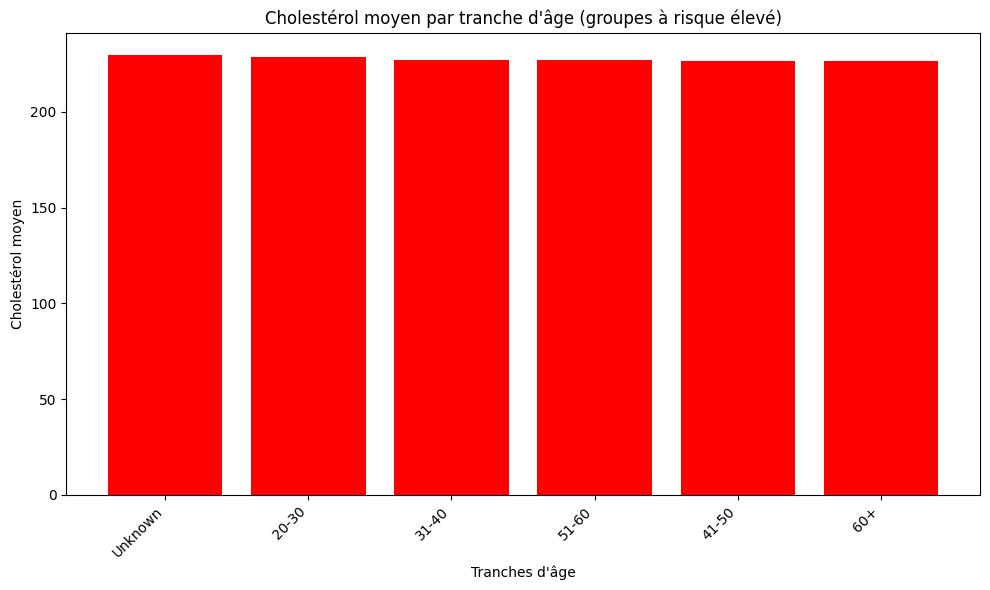

Groupe avec le cholestérol moyen le plus élevé :
      Country  Gender Age_Group  Avg_Cholesterol_Level  Avg_Blood_Pressure  \
178  Pakistan  Female   Unknown             229.819293          130.185729   

     Avg_Stress_Levels  Avg_HDL_Cholesterol  Avg_LDL_Cholesterol  \
178           5.337875            58.699663           126.390472   

     Avg_Triglycerides  Total_Records  Count_Smoking  \
178         280.283976            256              0   

     Count_Alcohol_Consumption  Count_Physically_Active  Count_Obesity  \
178                        256                       91            134   

     Count_Diabetes  Count_Heart_Attack_Died  
178             126                      126  


In [ ]:
import matplotlib.pyplot as plt

#  les groupes par cholestérol moyen de manière décroissante
high_cholesterol_groups_sorted = high_cholesterol_groups.sort_values(by="Avg_Cholesterol_Level", ascending=False)

# Graphique des groupes avec un cholestérol élevé (trié par cholestérol moyen)
plt.figure(figsize=(10, 6))
plt.bar(high_cholesterol_groups_sorted["Age_Group"], high_cholesterol_groups_sorted["Avg_Cholesterol_Level"], color="red")
plt.xlabel("Tranches d'âge")
plt.ylabel("Cholestérol moyen")
plt.title("Cholestérol moyen par tranche d'âge (groupes à risque élevé)")
plt.xticks(rotation=45, ha='right') 
 # Rotation des labels de l'axe x pour une meilleure lisibilité
plt.tight_layout()  
#  ajuster l'espacement des labels
plt.show()

# Affichage  des groupes avec le cholestérol moyen le plus élevé
print("Groupe avec le cholestérol moyen le plus élevé :")
print(high_cholesterol_groups_sorted.head(1))

Graphique pour les décès par groupe

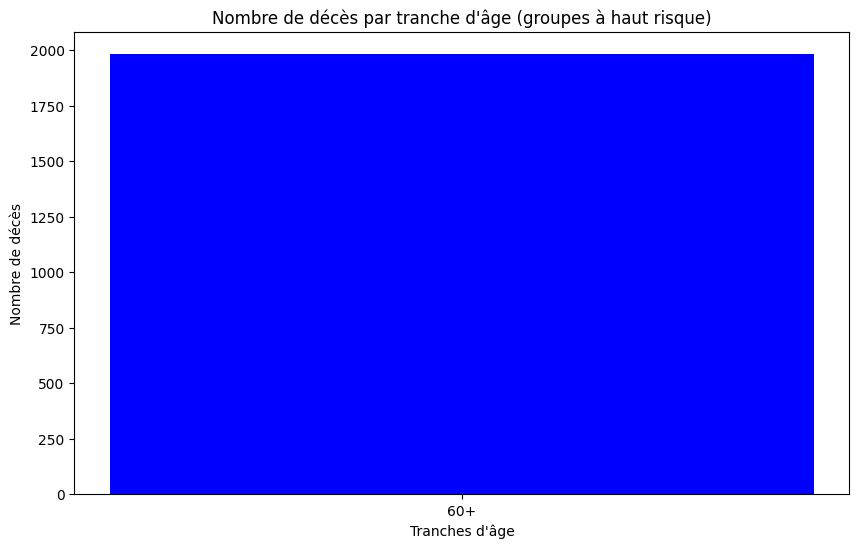

In [59]:
# Graphique des groupes avec un grand nombre de décès
plt.figure(figsize=(10, 6))
plt.bar(high_death_groups["Age_Group"], high_death_groups["Count_Heart_Attack_Died"], color="blue")
plt.xlabel("Tranches d'âge")
plt.ylabel("Nombre de décès")
plt.title("Nombre de décès par tranche d'âge (groupes à haut risque)")
plt.show()

PROBLEMATIQUES 2 

In [94]:



# des groupes à risque élevé de maladies cardiaques 
# Calculer le cholestérol moyen par tranche d'âge et par genre
query = '''
SELECT Age, Gender, AVG(Cholesterol_Level) as Avg_Cholesterol
FROM crisecardiaque
GROUP BY Age, Gender
ORDER BY Avg_Cholesterol DESC;
'''
cursor.execute(query)
risk_groups = cursor.fetchall()

# Afficher les groupes à risque élevé de cholestérol
print("Groupes à risque élevé de cholestérol :")
for group in risk_groups:
    print(f"Age: {group[0]}, Gender: {group[1]}, Avg Cholesterol: {group[2]}")

Groupes à risque élevé de cholestérol :
Age: 31, Gender: Male, Avg Cholesterol: 226.9792258681009
Age: 47, Gender: Female, Avg Cholesterol: 226.82540380492773
Age: 84, Gender: Female, Avg Cholesterol: 226.61752624394342
Age: 21, Gender: Female, Avg Cholesterol: 226.6035707014997
Age: 23, Gender: Male, Avg Cholesterol: 226.51642601544475
Age: 87, Gender: Male, Avg Cholesterol: 226.4515944781501
Age: 61, Gender: Female, Avg Cholesterol: 226.34576770062594
Age: 86, Gender: Female, Avg Cholesterol: 226.2933335631042
Age: 30, Gender: Female, Avg Cholesterol: 226.22624062562122
Age: 51, Gender: Female, Avg Cholesterol: 226.1425647304118
Age: 63, Gender: Female, Avg Cholesterol: 226.13100743645302
Age: 30, Gender: Male, Avg Cholesterol: 226.11669526734673
Age: 76, Gender: Male, Avg Cholesterol: 226.0738665250111
Age: 20, Gender: Male, Avg Cholesterol: 226.04239543393504
Age: 29, Gender: Female, Avg Cholesterol: 225.97165780681306
Age: 24, Gender: Female, Avg Cholesterol: 225.9588578299671
Age

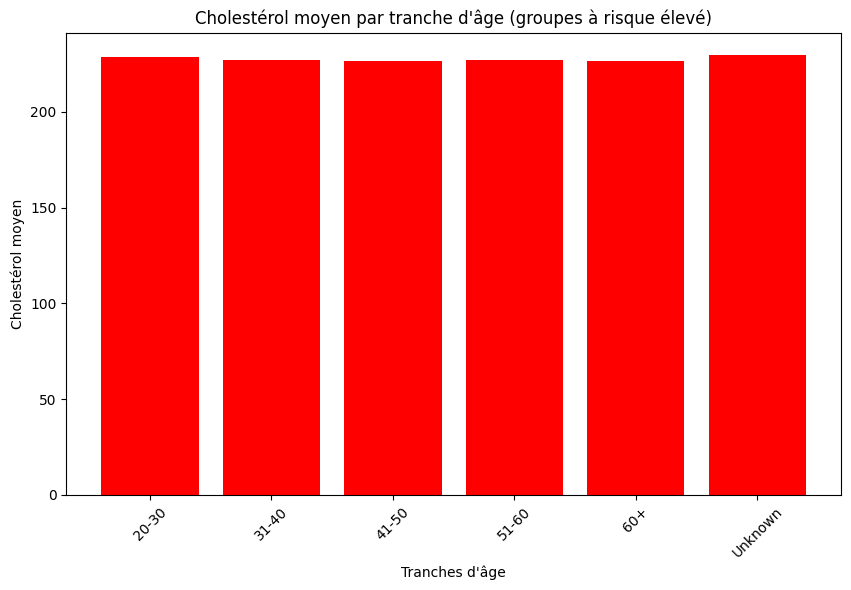

In [62]:
# Identification des groupes à risque élevé de cholestérol :

import matplotlib.pyplot as plt

# Graphique pour visualiser le cholestérol moyen par tranche d'âge et par genre
plt.figure(figsize=(10, 6))
plt.bar(high_cholesterol_groups["Age_Group"], high_cholesterol_groups["Avg_Cholesterol_Level"], color="red")
plt.xlabel("Tranches d'âge")
plt.ylabel("Cholestérol moyen")
plt.title("Cholestérol moyen par tranche d'âge (groupes à risque élevé)")
plt.xticks(rotation=45)
plt.show()

In [64]:
pip install seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ----------------------------- -------- 225.3/294.9 kB 4.7 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


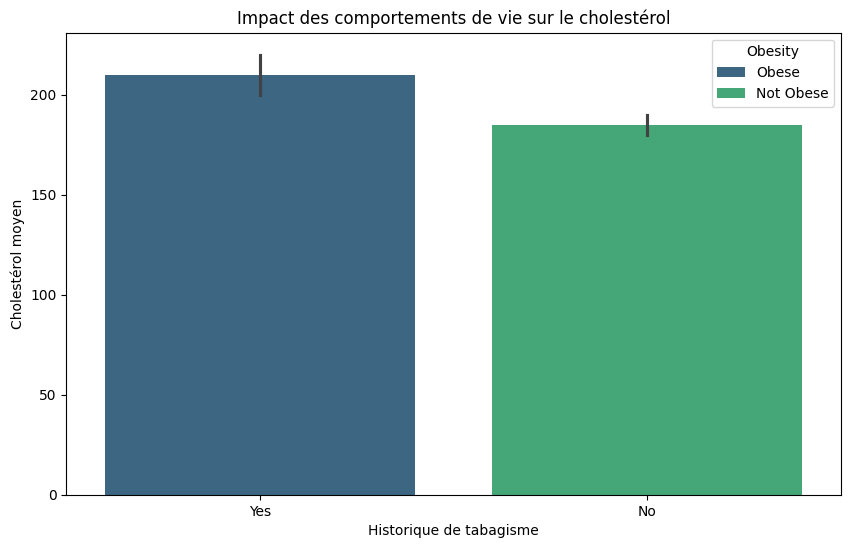

In [69]:
#  création du DataFrame
data = {
    "Smoking_History": ["Yes", "No", "Yes", "No"],
    "Avg_Cholesterol": [200, 180, 220, 190],
    "Obesity": ["Obese", "Not Obese", "Obese", "Not Obese"]
}
behaviors = pd.DataFrame(data)

# Graphique pour visualiser l'impact des habitudes de vie sur le cholestérol moyen
plt.figure(figsize=(10, 6))
sns.barplot(x='Smoking_History', y='Avg_Cholesterol', hue='Obesity', data=behaviors, palette='viridis')
plt.xlabel("Historique de tabagisme")
plt.ylabel("Cholestérol moyen")
plt.title("Impact des comportements de vie sur le cholestérol")
plt.show()

In [72]:
#Rôle du cholestérol et des facteurs biochimiques
# Vérification les relations entre le cholestérol LDL, HDL et le risque de crise cardiaque
# Connexion à la base de données SQLite
conn = sqlite3.connect('crisecardiaque.db')
cursor = conn.cursor()
query = '''
SELECT AVG(LDL_Cholesterol) AS Avg_LDL, AVG(HDL_Cholesterol) AS Avg_HDL, AVG(Triglycerides) AS Avg_Triglycerides
FROM crisecardiaque
WHERE Heart_Attack_History = 'Yes'
'''
cursor.execute(query)
cholesterol_factors = cursor.fetchall()

# Affichage des résultats
print(f"Avg LDL Cholesterol: {cholesterol_factors[0][0]}")
print(f"Avg HDL Cholesterol: {cholesterol_factors[0][1]}")
print(f"Avg Triglycerides: {cholesterol_factors[0][2]}")

Avg LDL Cholesterol: 124.95503108885427
Avg HDL Cholesterol: 60.01709218659094
Avg Triglycerides: 274.8378105323017


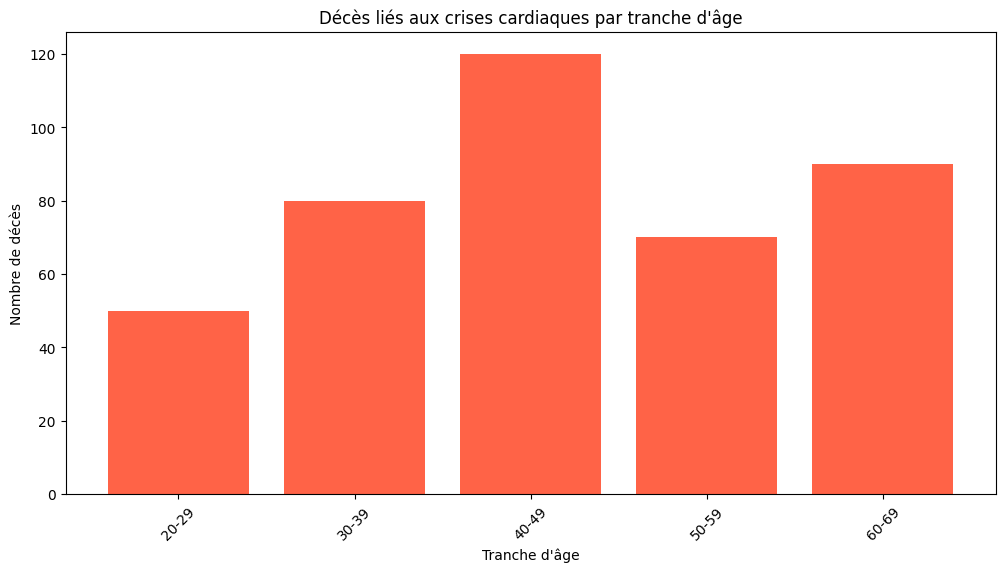

In [75]:
import matplotlib.pyplot as plt

# Exemple de données pour deaths
deaths = [
    (20, "Died", 50),
    (30, "Died", 80),
    (40, "Died", 120),
    (50, "Died", 70),
    (60, "Died", 90)
]

# Préparation les données pour la visualisation
age_groups = [f"{age}-{age+9}" for age, outcome, _ in deaths]
death_counts = [count for _, _, count in deaths]

# Visualisation
plt.figure(figsize=(12, 6))
plt.bar(age_groups, death_counts, color="tomato")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre de décès")
plt.title("Décès liés aux crises cardiaques par tranche d'âge")
plt.xticks(rotation=45)
plt.show()

           Country  Avg_Cholesterol  Avg_Blood_Pressure
0        Australia       224.773635          130.010780
1       Bangladesh       225.171298          129.649516
2           Brazil       225.177071          129.754020
3           Canada       225.286824          130.070862
4            China       225.219069          130.138460
5            Egypt       225.179436          129.999235
6           France       224.803672          130.122192
7          Germany       224.748961          130.216638
8            India       224.519781          129.673439
9        Indonesia       225.083188          130.482738
10           Italy       224.876567          130.142136
11           Japan       225.363776          130.091791
12          Mexico       225.001208          130.273158
13         Nigeria       224.508003          129.684229
14        Pakistan       225.338338          130.015735
15     Philippines       224.639443          129.826105
16          Russia       225.075480          130

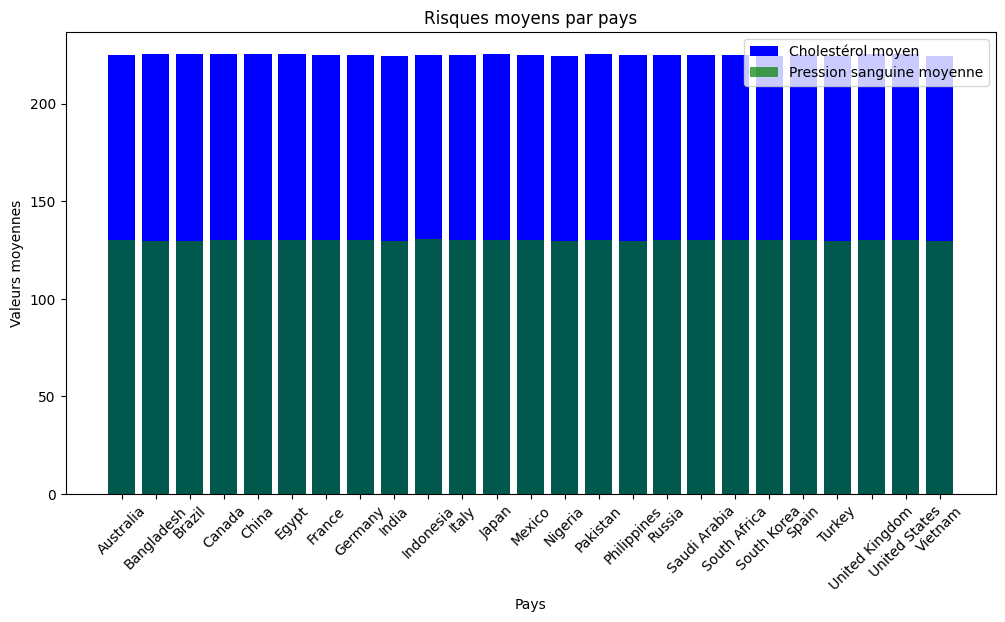

In [78]:
# Chargement des données dans un DataFrame
query = "SELECT Country, AVG(Cholesterol_Level) as Avg_Cholesterol, AVG(Blood_Pressure) as Avg_Blood_Pressure FROM crisecardiaque GROUP BY Country;"
country_risks = pd.read_sql_query(query, conn)

# Affichage pour vérification
print(country_risks)

# Utilisation dans une visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(country_risks['Country'], country_risks['Avg_Cholesterol'], color='blue', label='Cholestérol moyen')
plt.bar(country_risks['Country'], country_risks['Avg_Blood_Pressure'], color='green', label='Pression sanguine moyenne', alpha=0.7)
plt.xlabel("Pays")
plt.ylabel("Valeurs moyennes")
plt.title("Risques moyens par pays")
plt.legend()
plt.xticks(rotation=45)
plt.show()

        Stress_Levels  Avg_Cholesterol  Avg_Blood_Pressure  Total_Patients
0            1.000037       205.954251          125.074981               1
1            1.000039       170.954655          132.145129               1
2            1.000059       240.424790           81.095770               1
3            1.000072       284.507003          135.969565               1
4            1.000074       280.834228          153.619509               1
...               ...              ...                 ...             ...
467325       9.999872       236.065379          178.093217               1
467326       9.999895       168.240503           96.527031               1
467327       9.999903       261.774473          140.412560               1
467328       9.999921       191.512183           89.614257               1
467329       9.999970       239.970370          171.724147               1

[467330 rows x 4 columns]


C:\Users\oumar\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


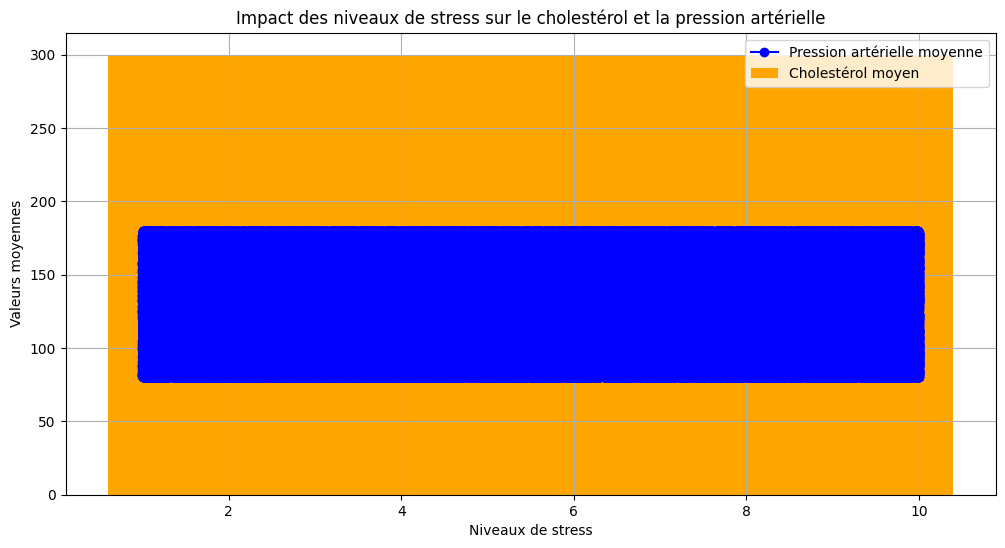

In [79]:


# Requête SQL pour analyser l'impact du stress
query = """
SELECT 
    Stress_Levels,
    AVG(Cholesterol_Level) as Avg_Cholesterol,
    AVG(Blood_Pressure) as Avg_Blood_Pressure,
    COUNT(*) as Total_Patients
FROM crisecardiaque
GROUP BY Stress_Levels
ORDER BY Stress_Levels;
"""
# Charger les résultats dans un DataFrame Pandas
stress_impact = pd.read_sql_query(query, conn)

# Afficher les données pour vérification
print(stress_impact)
#Visualisation de l’impact du stress :
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(stress_impact["Stress_Levels"], stress_impact["Avg_Cholesterol"], color="orange", label="Cholestérol moyen")
plt.plot(stress_impact["Stress_Levels"], stress_impact["Avg_Blood_Pressure"], marker="o", color="blue", label="Pression artérielle moyenne")
plt.xlabel("Niveaux de stress")
plt.ylabel("Valeurs moyennes")
plt.title("Impact des niveaux de stress sur le cholestérol et la pression artérielle")
plt.legend()
plt.grid()
plt.show()

     Age  Gender  Deaths  Total_Cases
0     18  Female    1596         3182
1     18    Male    1604         3216
2     19  Female    1631         3248
3     19    Male    1629         3304
4     20  Female    1650         3316
..   ...     ...     ...          ...
139   87    Male    1709         3327
140   88  Female    1565         3263
141   88    Male    1642         3231
142   89  Female    1654         3261
143   89    Male    1516         3196

[144 rows x 4 columns]


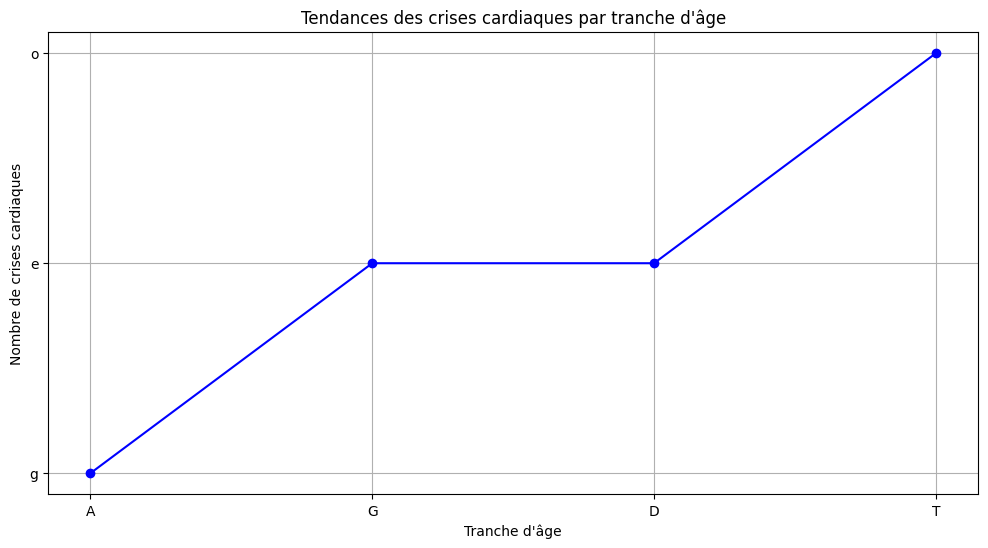

In [84]:
 #Prédiction de l’évolution de la santé cardiaque :
query = """
SELECT 
    Age,
    Gender,
    COUNT(CASE WHEN Heart_Attack_Outcome = 'Died' THEN 1 END) as Deaths,
    COUNT(*) as Total_Cases
FROM crisecardiaque
GROUP BY Age, Gender
ORDER BY Age;
"""
heart_attack_trends = pd.read_sql_query(query, conn)
print(heart_attack_trends)

# Visualisation des tendances des crises cardiaques par tranches d'âge
ages = [trend[0] for trend in heart_attack_trends]
heart_attacks = [trend[1] for trend in heart_attack_trends]

plt.figure(figsize=(12, 6))
plt.plot(ages, heart_attacks, marker='o', linestyle='-', color='b')
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre de crises cardiaques")
plt.title("Tendances des crises cardiaques par tranche d'âge")
plt.grid(True)
plt.show()

  Medication_Adherence  Deaths  Avg_Cholesterol  Avg_Blood_Pressure  \
0                   No  116981       224.852578          129.935233   
1                  Yes  116594       225.059059          130.097189   

   Total_Patients  
0          233982  
1          233348  


C:\Users\oumar\AppData\Local\Temp\ipykernel_18576\4227021881.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medication_Adherence', y='Avg_Cholesterol', data=medication_adh, palette='magma')


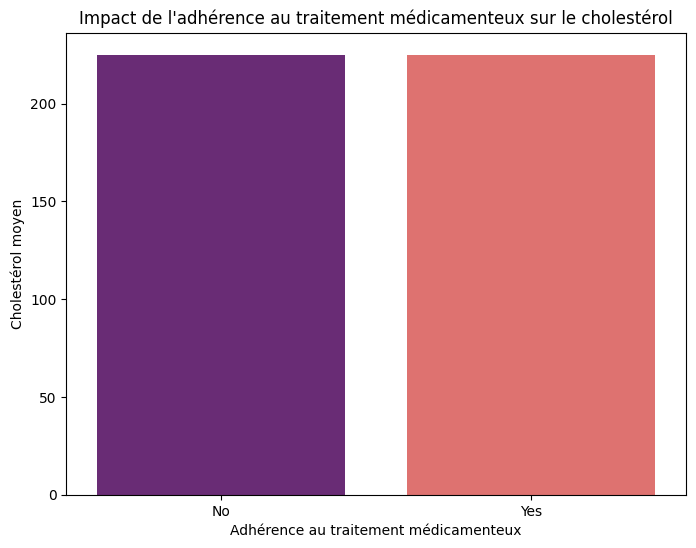

In [85]:
# Visualisation de l'adhérence au traitement médicamenteux
query = """
SELECT 
    Medication_Adherence,
    COUNT(CASE WHEN Heart_Attack_Outcome = 'Died' THEN 1 END) as Deaths,
    AVG(Cholesterol_Level) as Avg_Cholesterol,
    AVG(Blood_Pressure) as Avg_Blood_Pressure,
    COUNT(*) as Total_Patients
FROM crisecardiaque
GROUP BY Medication_Adherence;
"""
medication_adh = pd.read_sql_query(query, conn)
print(medication_adh)
plt.figure(figsize=(8, 6))
sns.barplot(x='Medication_Adherence', y='Avg_Cholesterol', data=medication_adh, palette='magma')
plt.xlabel("Adhérence au traitement médicamenteux")
plt.ylabel("Cholestérol moyen")
plt.title("Impact de l'adhérence au traitement médicamenteux sur le cholestérol")
plt.show()

     Age  Gender  Avg_Cholesterol  Avg_Stress  Deaths  Total_Patients
0     18  Female       225.334873    5.493887    1596            3182
1     18    Male       224.594348    5.496368    1604            3216
2     19  Female       224.921062    5.469727    1631            3248
3     19    Male       225.141677    5.442006    1629            3304
4     20  Female       223.376131    5.521976    1650            3316
..   ...     ...              ...         ...     ...             ...
139   87    Male       226.451594    5.520473    1709            3327
140   88  Female       224.138873    5.554302    1565            3263
141   88    Male       225.450377    5.495144    1642            3231
142   89  Female       224.015184    5.560098    1654            3261
143   89    Male       223.926329    5.509779    1516            3196

[144 rows x 6 columns]


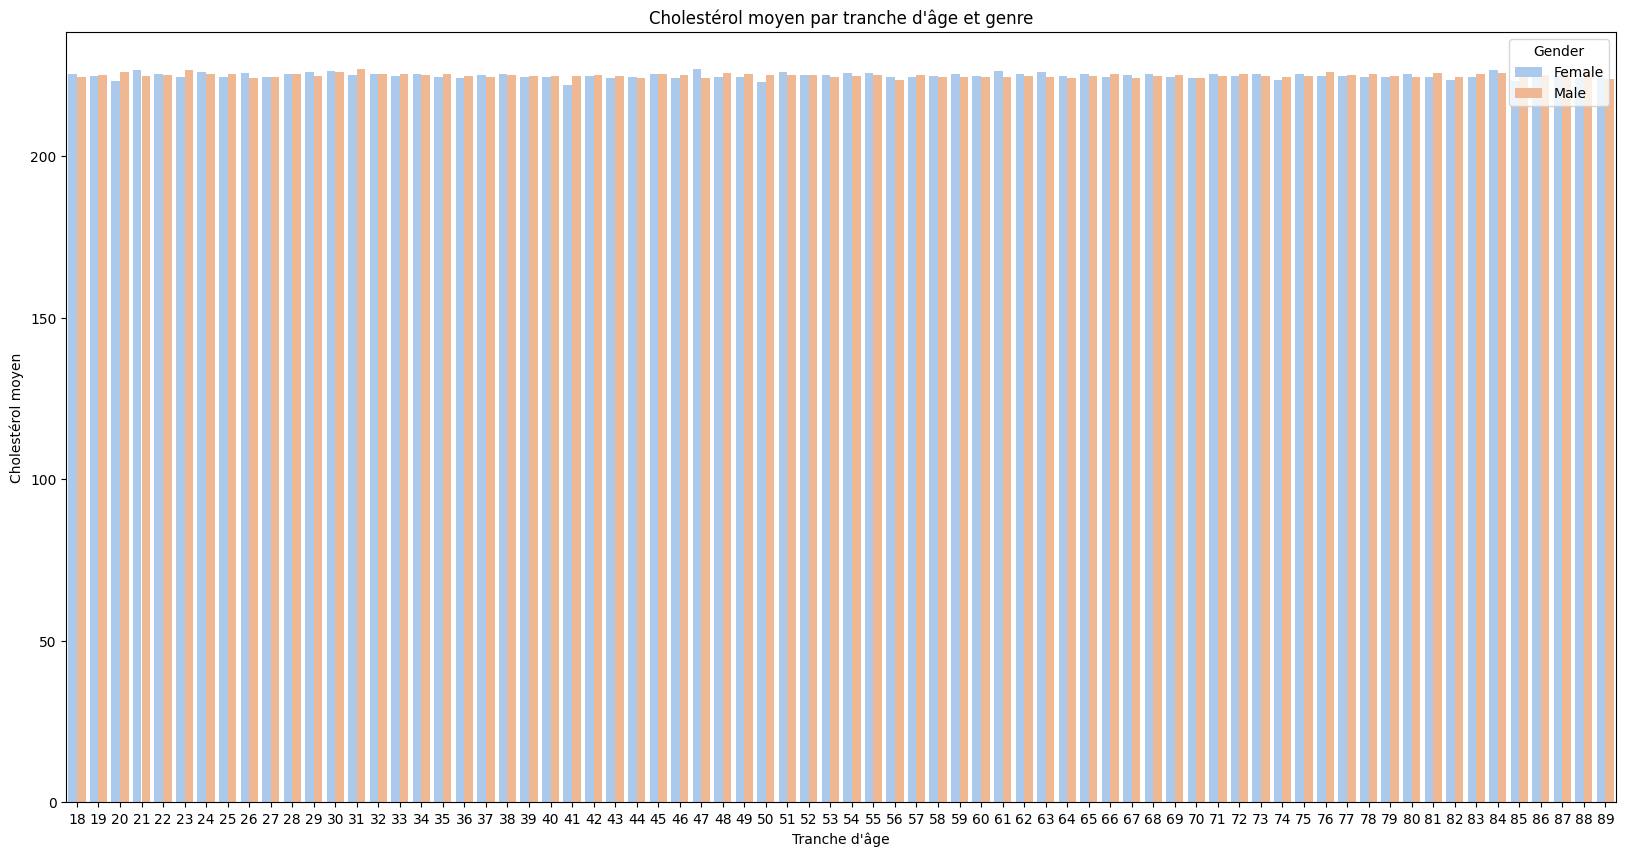

In [91]:
# Visualisation des risques par tranches d'âge et genre
query = """
SELECT 
    Age,
    Gender,
    AVG(Cholesterol_Level) as Avg_Cholesterol,
    AVG(Stress_Levels) as Avg_Stress,
    COUNT(CASE WHEN Heart_Attack_Outcome = 'Died' THEN 1 END) as Deaths,
    COUNT(*) as Total_Patients
FROM crisecardiaque
GROUP BY Age, Gender
ORDER BY Age;
"""
age_gender_risk = pd.read_sql_query(query, conn)
print(age_gender_risk)

plt.figure(figsize=(20, 10))
sns.barplot(x='Age', y='Avg_Cholesterol', hue='Gender', data=age_gender_risk, palette="pastel")
plt.xlabel("Tranche d'âge")
plt.ylabel("Cholestérol moyen")
plt.title("Cholestérol moyen par tranche d'âge et genre")
plt.show()


  Access_To_Healthcare  Total_Cases  Total_Deaths  Total_Survived  Death_Rate
0                 Poor       155552         77836           77716   50.038572
1                 Good       156376         78214           78162   50.016627
2              Average       155402         77525           77877   49.886745


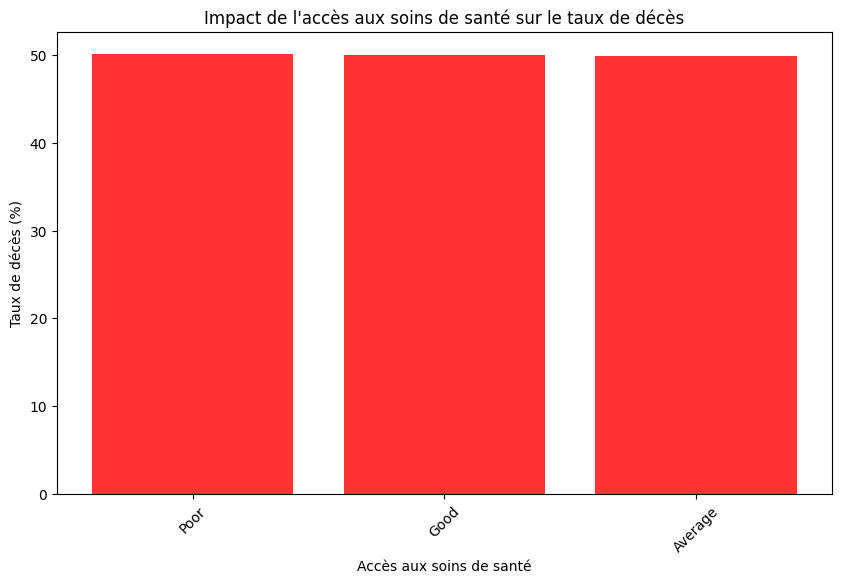

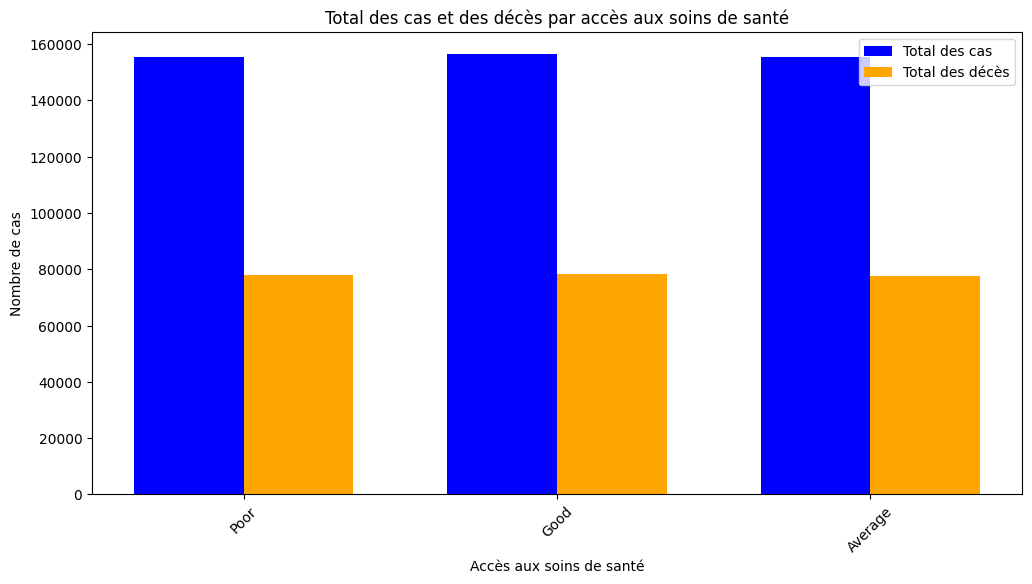

In [97]:


#Regroupons les données et calculons les métriques nécessaires :
query = """
SELECT 
    Access_To_Healthcare,
    COUNT(*) AS Total_Cases,
    SUM(CASE WHEN Heart_Attack_Outcome = 'Died' THEN 1 ELSE 0 END) AS Total_Deaths,
    SUM(CASE WHEN Heart_Attack_Outcome = 'Survived' THEN 1 ELSE 0 END) AS Total_Survived,
    (SUM(CASE WHEN Heart_Attack_Outcome = 'Died' THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS Death_Rate
FROM crisecardiaque
GROUP BY Access_To_Healthcare
ORDER BY Death_Rate DESC;
"""
healthcare_impact = pd.read_sql_query(query, conn)
print(healthcare_impact)
##Taux de décès par accès aux soins de santé :
plt.figure(figsize=(10, 6))
plt.bar(healthcare_impact["Access_To_Healthcare"], healthcare_impact["Death_Rate"], color="red", alpha=0.8)
plt.xlabel("Accès aux soins de santé")
plt.ylabel("Taux de décès (%)")
plt.title("Impact de l'accès aux soins de santé sur le taux de décès")
plt.xticks(rotation=45)
plt.show()
## Nombre total de cas et de décès :

import numpy as np

x = np.arange(len(healthcare_impact["Access_To_Healthcare"]))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, healthcare_impact["Total_Cases"], width, label="Total des cas", color="blue")
bar2 = ax.bar(x + width/2, healthcare_impact["Total_Deaths"], width, label="Total des décès", color="orange")

ax.set_xlabel("Accès aux soins de santé")
ax.set_ylabel("Nombre de cas")
ax.set_title("Total des cas et des décès par accès aux soins de santé")
ax.set_xticks(x)
ax.set_xticklabels(healthcare_impact["Access_To_Healthcare"])
ax.legend()

plt.xticks(rotation=45)
plt.show()


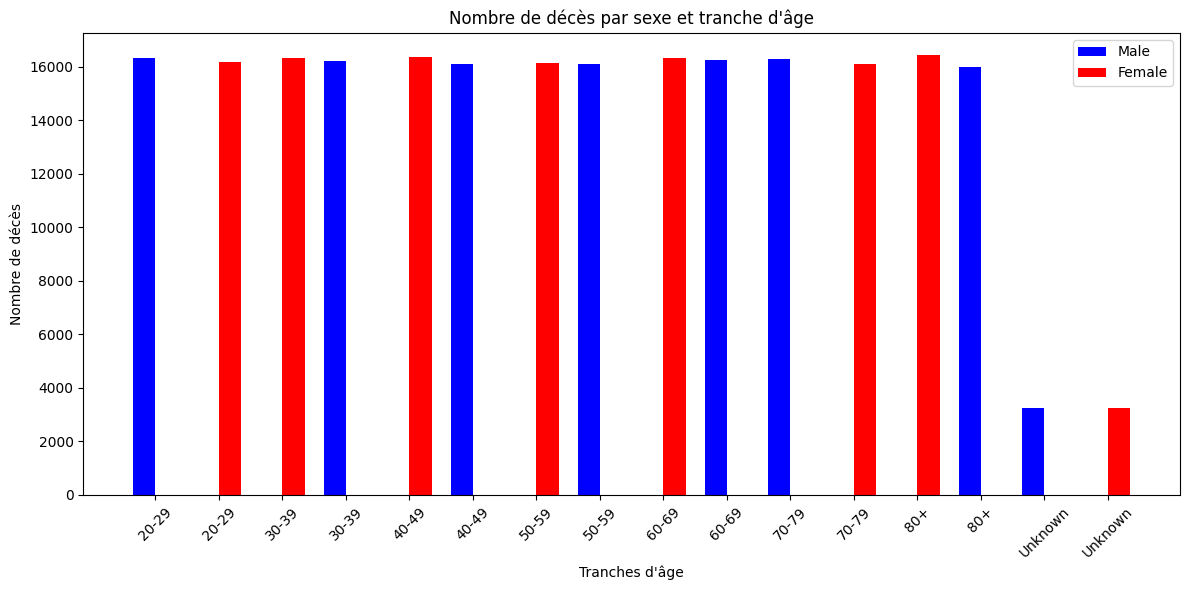

In [99]:


# Requête SQL pour obtenir le nombre de décès par sexe et tranche d'âge
query = '''
SELECT 
    Gender,
    CASE 
        WHEN Age BETWEEN 20 AND 29 THEN '20-29'
        WHEN Age BETWEEN 30 AND 39 THEN '30-39'
        WHEN Age BETWEEN 40 AND 49 THEN '40-49'
        WHEN Age BETWEEN 50 AND 59 THEN '50-59'
        WHEN Age BETWEEN 60 AND 69 THEN '60-69'
        WHEN Age BETWEEN 70 AND 79 THEN '70-79'
        WHEN Age >= 80 THEN '80+'
        ELSE 'Unknown'
    END AS Age_Group,
    COUNT(*) AS Death_Count
FROM crisecardiaque
WHERE Heart_Attack_Outcome = 'Died'
GROUP BY Gender, Age_Group
ORDER BY Age_Group, Death_Count DESC;
'''

# Exécuter la requête
cursor.execute(query)

# Récupérer les résultats
results = cursor.fetchall()

# Fermer la connexion
conn.close()

# Préparer les données pour le graphique
age_groups = []
male_deaths = []
female_deaths = []

# Organiser les résultats dans des listes par sexe
for row in results:
    age_groups.append(row[1])                                    ##     LES UNKNOW C'EST LES MOINS DE 20 ANS.
    if row[0] == 'Male':
        male_deaths.append(row[2])
        female_deaths.append(0)
    else:
        female_deaths.append(row[2])
        male_deaths.append(0)

# Créer un graphique à barres pour comparer les décès par sexe et tranche d'âge
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(age_groups))

plt.bar(index, male_deaths, bar_width, label='Male', color='blue')
plt.bar([i + bar_width for i in index], female_deaths, bar_width, label='Female', color='red')

# Ajouter des labels et un titre
plt.xlabel('Tranches d\'âge')
plt.ylabel('Nombre de décès')
plt.title('Nombre de décès par sexe et tranche d\'âge')
plt.xticks([i + bar_width / 2 for i in index], age_groups, rotation=45)
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

FIN DE MON ANALYSE